# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
import time

# Pause to allow the page to load
time.sleep(1)

# Get the page's HTML
html = browser.html

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')


In [5]:
# Extract all rows of data
# Find the table
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
headers = [header.text.strip() for header in rows[0].find_all('th')]

# Loop through the remaining rows and extract data
for row in rows[1:]:
    columns = row.find_all('td')
    row_data = [col.text.strip() for col in columns]
    mars_weather_data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_weather_data, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
# Convert terrestrial_date to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert numerical columns to appropriate data types
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)



In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
num_months


12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
num_sols


1867

In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

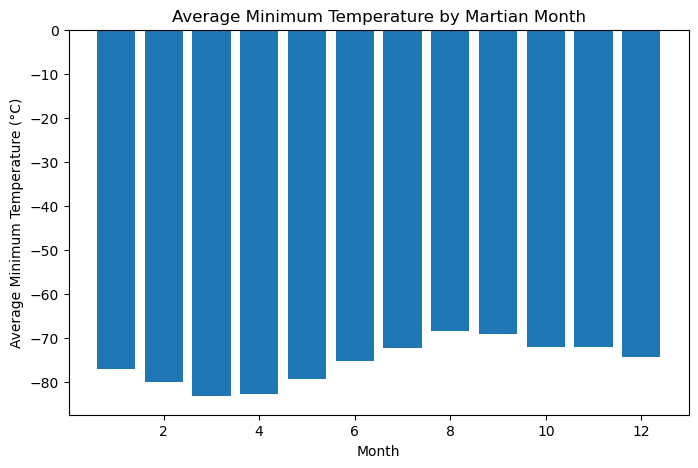

In [18]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

# Plot average minimum temperature per Martian month
plt.figure(figsize=(8,5))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Martian Month')
plt.show()

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Plot average minimum temperature per Martian month
plt.figure(figsize=(8,5))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Martian Month')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mars_weather_data.csv'

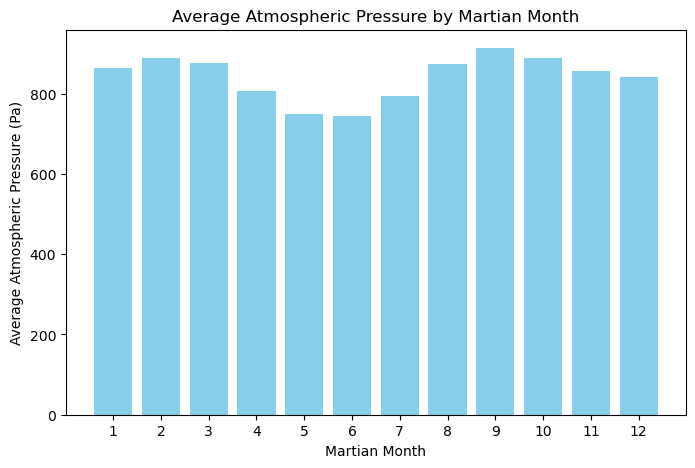

In [20]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month, color='skyblue')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xticks(range(1, 13))  # Ensure all months are labeled on x-axis
plt.show()

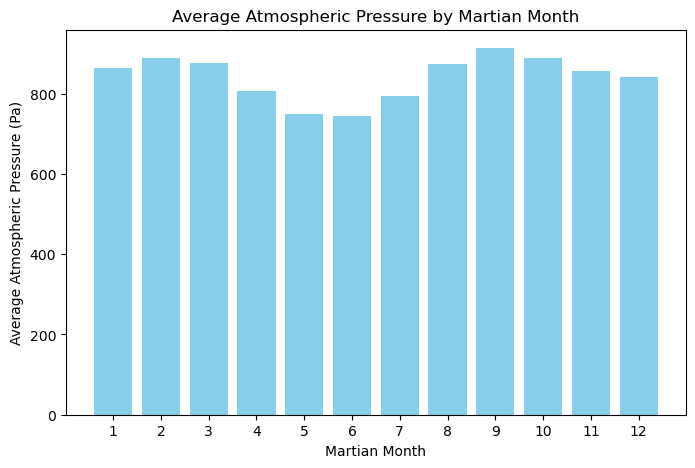

In [21]:
# Plot the average pressure by monthh
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month, color='skyblue')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xticks(range(1, 13))  # Ensuring all months are labeled on the x-axis
plt.show()


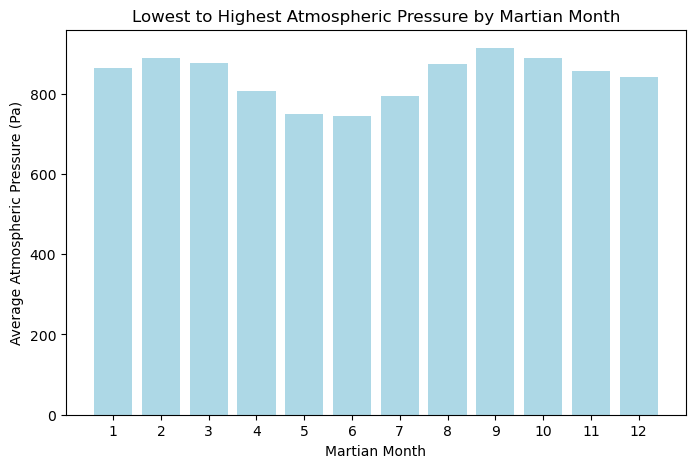

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location 
# by sorting the previous graph

import matplotlib.pyplot as plt

# Sort the average atmospheric pressure by month in ascending order
avg_pressure_sorted = df.groupby('month')['pressure'].mean().sort_values()

# Plot the sorted pressure values
plt.figure(figsize=(8,5))
plt.bar(avg_pressure_sorted.index, avg_pressure_sorted, color='lightblue')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Lowest to Highest Atmospheric Pressure by Martian Month')
plt.xticks(range(1, 13))  # Ensure all months are labeled on x-axis
plt.show()



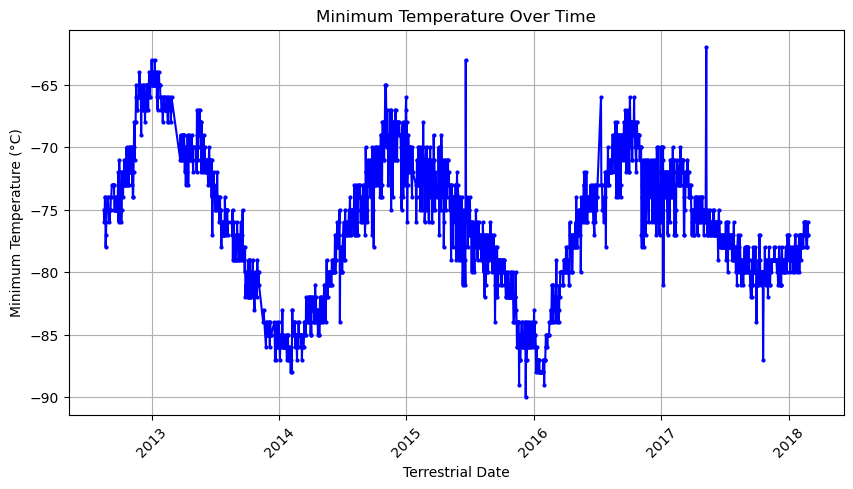

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature 
# of each observation in the data set.

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Sort data by date
df = df.sort_values(by='terrestrial_date')

# Plot daily minimum temperature over time
plt.figure(figsize=(10,5))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', markersize=2, color='blue')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Minimum Temperature

Average minimum temperature ranges from about -85 degrees C to -68 degrees C, and seems to hit the bottom on month 3

#### Atmospheric Pressure

Atmospheric pressure ranges from 700 PSI to 900 PSI. With valleys in 5th and 6th months and peaks in the 2nd and 9th months.

#### Year Length
It looks like, from the last graph, that Mars has a year length twice as long as Earth's, based on the distance between peaks and valleys in the average temperature


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Save to a CSV file
csv_filename = "sorted_martian_pressure.csv"
avg_pressure_sorted_df.to_csv(csv_filename, index=False)

In [22]:
browser.quit()